In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# DATA

In [2]:
clubs = pd.read_csv('epl_clubs_info_2022-23.csv')
clubs.head(20)

,club_name,abv,hex_code,logo_link
0,Arsenal,ARS,#EF0107,https://a.espncdn.com/i/teamlogos/soccer/500/3...
1,Aston Villa,AVL,#95BFE5,https://a.espncdn.com/i/teamlogos/soccer/500/3...
2,Bournemouth,BOU,#C91318,https://a.espncdn.com/i/teamlogos/soccer/500/3...
3,Brentford,BRE,#E30613,https://a.espncdn.com/i/teamlogos/soccer/500/3...
4,Brighton,BRI,#005DAA,https://a.espncdn.com/i/teamlogos/soccer/500/3...
5,Chelsea,CHE,#034694,https://a.espncdn.com/i/teamlogos/soccer/500/3...
6,Crystal Palace,CRY,#1B458F,https://a.espncdn.com/i/teamlogos/soccer/500/3...
7,Everton,EVE,#003399,https://a.espncdn.com/i/teamlogos/soccer/500/3...
8,Fulham,FUL,#000000,https://a.espncdn.com/i/teamlogos/soccer/500/3...
9,Leeds,LEE,#FFCD00,https://a.espncdn.com/i/teamlogos/soccer/500/3...


In [3]:
results = pd.read_csv('epl_results_2022-23.csv')
results

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,2,2,16,11,3,5,1,2,0,0
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,3,4,7,9,4,4,2,0,0,0
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,3,2,18,16,5,5,3,3,0,0
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,4,6,13,9,6,4,2,0,0,0
4,E0,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,...,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,E0,08/04/2023,15:00,Tottenham,Brighton,2,1,H,1,1,...,3,4,15,15,3,7,3,1,0,0
292,E0,08/04/2023,15:00,Wolves,Chelsea,1,0,H,1,0,...,4,1,14,10,8,8,2,5,0,0
293,E0,08/04/2023,17:30,Southampton,Man City,1,4,A,0,1,...,1,8,6,10,0,10,0,2,0,0
294,E0,09/04/2023,14:00,Leeds,Crystal Palace,1,5,A,1,1,...,7,8,11,8,2,4,3,1,0,0


In [4]:
pl_cleaned = results.drop(['Div','Date', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC','AC','HY','AY','HR','AR'], axis=1)
pl_cleaned

,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF
0,20:00,Crystal Palace,Arsenal,0,2,A,A Taylor,16,11
1,12:30,Fulham,Liverpool,2,2,D,A Madley,7,9
2,15:00,Bournemouth,Aston Villa,2,0,H,P Bankes,18,16
3,15:00,Leeds,Wolves,2,1,H,R Jones,13,9
4,15:00,Newcastle,Nottingham,2,0,H,S Hooper,9,14
...,...,...,...,...,...,...,...,...,...
291,15:00,Tottenham,Brighton,2,1,H,S Attwell,15,15
292,15:00,Wolves,Chelsea,1,0,H,P Bankes,14,10
293,17:30,Southampton,Man City,1,4,A,R Jones,6,10
294,14:00,Leeds,Crystal Palace,1,5,A,S Hooper,11,8


# WEBSCRAPPING

In [5]:
pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats#all_stats_squads_defense")[0]

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,28,5,5,94,33,61,89,2.34,78.7,32.1,46.6,1.23,53249,Erling Haaland - 36,Ederson,→ Champions League via league finish
1,2,Arsenal,38,26,6,6,88,43,45,84,2.21,71.9,42.0,29.9,0.79,60191,"Martin Ødegaard, Martinelli - 15",Aaron Ramsdale,→ Champions League via league finish
2,3,Manchester Utd,38,23,6,9,58,43,15,75,1.97,67.7,50.4,17.3,0.45,73671,Marcus Rashford - 17,David de Gea,→ Champions League via league finish
3,4,Newcastle Utd,38,19,14,5,68,33,35,71,1.87,72.0,39.6,32.4,0.85,52127,Callum Wilson - 18,Nick Pope,→ Champions League via league finish
4,5,Liverpool,38,19,10,9,75,47,28,67,1.76,72.6,50.9,21.7,0.57,53163,Mohamed Salah - 19,Alisson,→ Europa League via league finish
5,6,Brighton,38,18,8,12,72,53,19,62,1.63,73.3,50.2,23.1,0.61,31477,Alexis Mac Allister - 10,Robert Sánchez,→ Europa League via league finish
6,7,Aston Villa,38,18,7,13,51,46,5,61,1.61,50.2,52.5,-2.2,-0.06,39485,Ollie Watkins - 15,Emiliano Martínez,→ Europa Conference League via league finish
7,8,Tottenham,38,18,6,14,70,63,7,60,1.58,57.1,49.7,7.4,0.20,61585,Harry Kane - 30,Hugo Lloris,NaN
8,9,Brentford,38,15,14,9,58,46,12,59,1.55,56.8,49.9,6.8,0.18,17078,Ivan Toney - 20,David Raya,NaN
9,10,Fulham,38,15,7,16,55,53,2,52,1.37,46.2,63.8,-17.6,-0.46,23746,Aleksandar Mitrović - 14,Bernd Leno,NaN


In [6]:
pd.read_html("https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&comp_type=spec&dom_lg=1&spec_comps=9&player_id1=1f44ac21&p1yrfrom=2022-2023&player_id2=21a66f6a&p2yrfrom=2022-2023&player_id3=e09f279b&p3yrfrom=2022-2023&player_id4=e342ad68&p4yrfrom=2022-2023&player_id5=48a5a5d6&p5yrfrom=2022-2023&player_id6=a1d5bd30&p6yrfrom=2022-2023&player_id7=aed3a70f&p7yrfrom=2022-2023")[0]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     Erling Haaland            2022-23             no NOR                 FW   
1         Harry Kane            2022-23            eng ENG                 FW   
2         Ivan Toney            2022-23            eng ENG                 FW   
3      Mohamed Salah            2022-23             eg EGY                 FW   
4         Martinelli            2022-23             br BRA                 FW   
5    Marcus Rashford            2022-23            eng ENG                 FW   

  Unnamed: 4_level_0 Playing Time                    Performance  ...  \
               Squad           MP Starts   Min   90s         Gls  ...   
0    Manchester City           35     33  2769  30.8          36  ...   
1          Tottenham           38     38  3405  37.8          30  ...   
2          Brentford           33     33  2951  32.8          20  ...   
3          Liverpool           38     37  3290  36.6          19  ...   
4            Arsenal           36     34  2789  31.0          15  ...   
5     Manchester Utd           35     32  2879  32.0          17  ...   

  Per 90 Minutes                                                             
             Gls   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0           1.17  0.26  1.43  0.94   1.20  0.92  0.17   1.10  0.75     0.92  
1           0.79  0.08  0.87  0.66   0.74  0.57  0.18   0.75  0.44     0.63  
2           0.61  0.12  0.73  0.43   0.55  0.57  0.15   0.73  0.40     0.56  
3           0.52  0.33  0.85  0.47   0.79  0.59  0.21   0.80  0.51     0.72  
4           0.48  0.16  0.65  0.48   0.65  0.30  0.29   0.59  0.30     0.59  
5           0.53  0.16  0.69  0.53   0.69  0.48  0.11   0.59  0.48     0.59  

[6 rows x 34 columns]

In [7]:
goals = pd.read_html("https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&comp_type=spec&dom_lg=1&spec_comps=9&player_id1=1f44ac21&p1yrfrom=2022-2023&player_id2=21a66f6a&p2yrfrom=2022-2023&player_id3=e09f279b&p3yrfrom=2022-2023&player_id4=e342ad68&p4yrfrom=2022-2023&player_id5=48a5a5d6&p5yrfrom=2022-2023&player_id6=a1d5bd30&p6yrfrom=2022-2023&player_id7=aed3a70f&p7yrfrom=2022-2023%22%22")[0].T
goals

0           1           2  \
Unnamed: 0_level_0 Player     Erling Haaland  Harry Kane  Ivan Toney   
Unnamed: 1_level_0 Span              2022-23     2022-23     2022-23   
Unnamed: 2_level_0 Nation             no NOR     eng ENG     eng ENG   
Unnamed: 3_level_0 Pos                    FW          FW          FW   
Unnamed: 4_level_0 Squad     Manchester City   Tottenham   Brentford   
Playing Time       MP                     35          38          33   
                   Starts                 33          38          33   
                   Min                  2769        3405        2951   
                   90s                  30.8        37.8        32.8   
Performance        Gls                    36          30          20   
                   Ast                     8           3           4   
                   G+A                    44          33          24   
                   G-PK                   29          25          14   
                   PK                      7           5           6   
                   PKatt                   7           6           7   
                   CrdY                    5           6           9   
                   CrdR                    0           0           0   
Expected           xG                   28.4        21.5        18.7   
                   npxG                 23.1        16.7        13.2   
                   xAG                   5.3         7.0         5.1   
                   npxG+xAG             28.4        23.7        18.3   
Progression        PrgC                   35          60          14   
                   PrgP                   58         180          79   
                   PrgR                  151         193         165   
Per 90 Minutes     Gls                  1.17        0.79        0.61   
                   Ast                  0.26        0.08        0.12   
                   G+A                  1.43        0.87        0.73   
                   G-PK                 0.94        0.66        0.43   
                   G+A-PK                1.2        0.74        0.55   
                   xG                   0.92        0.57        0.57   
                   xAG                  0.17        0.18        0.15   
                   xG+xAG                1.1        0.75        0.73   
                   npxG                 0.75        0.44         0.4   
                   npxG+xAG             0.92        0.63        0.56   

                                         3           4                5  
Unnamed: 0_level_0 Player    Mohamed Salah  Martinelli  Marcus Rashford  
Unnamed: 1_level_0 Span            2022-23     2022-23          2022-23  
Unnamed: 2_level_0 Nation           eg EGY      br BRA          eng ENG  
Unnamed: 3_level_0 Pos                  FW          FW               FW  
Unnamed: 4_level_0 Squad         Liverpool     Arsenal   Manchester Utd  
Playing Time       MP                   38          36               35  
                   Starts               37          34               32  
                   Min                3290        2789             2879  
                   90s                36.6        31.0             32.0  
Performance        Gls                  19          15               17  
                   Ast                  12           5                5  
                   G+A                  31          20               22  
                   G-PK                 17          15               17  
                   PK                    2           0                0  
                   PKatt                 4           0                0  
                   CrdY                  2           3                2  
                   CrdR                  0           0                0  
Expected           xG                 21.7         9.3             15.4  
                   npxG               18.5         9.3             15.4  
                   xAG                 7.7

In [8]:
goals_cleaned = goals.drop(['Expected', 'Progression', 'Per 90 Minutes'])
goals_cleaned.T

/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_3563/193189228.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  goals_cleaned = goals.drop(['Expected', 'Progression', 'Per 90 Minutes'])


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     Erling Haaland            2022-23             no NOR                 FW   
1         Harry Kane            2022-23            eng ENG                 FW   
2         Ivan Toney            2022-23            eng ENG                 FW   
3      Mohamed Salah            2022-23             eg EGY                 FW   
4         Martinelli            2022-23             br BRA                 FW   
5    Marcus Rashford            2022-23            eng ENG                 FW   

  Unnamed: 4_level_0 Playing Time                    Performance               \
               Squad           MP Starts   Min   90s         Gls Ast G+A G-PK   
0    Manchester City           35     33  2769  30.8          36   8  44   29   
1          Tottenham           38     38  3405  37.8          30   3  33   25   
2          Brentford           33     33  2951  32.8          20   4  24   14   
3          Liverpool           38     37  3290  36.6          19  12  31   17   
4            Arsenal           36     34  2789  31.0          15   5  20   15   
5     Manchester Utd           35     32  2879  32.0          17   5  22   17   

                      
  PK PKatt CrdY CrdR  
0  7     7    5    0  
1  5     6    6    0  
2  6     7    9    0  
3  2     4    2    0  
4  0     0    3    0  
5  0     0    2    0

In [9]:
referee_df = pd.read_html("https://www.soccerbase.com/referees/home.sd?tourn_id=1944")[0]
referee_df = referee_df.rename(columns={"NAME": "Referee"})

# ANALYSIS





#### Correlation between home and away fouls: are teams more likely to play aggressively at home or away.

In [10]:
pl_cleaned.groupby(['HomeTeam']).agg({'HF':'sum'}).sort_values('HF', ascending=False)

,HF
HomeTeam,
Leeds,191
Tottenham,185
Nottingham,185
Crystal Palace,183
Bournemouth,169
Southampton,164
Leicester,163
Wolves,163
Man United,159


In [11]:
pl_cleaned.groupby(['AwayTeam']).agg({'AF':'sum'}).sort_values('AF', ascending=False)

,AF
AwayTeam,
Wolves,190
Aston Villa,189
Southampton,187
Crystal Palace,175
Man United,167
Leeds,166
Chelsea,165
Nottingham,164
Fulham,164


In [12]:
home_HF = pl_cleaned.groupby(['HomeTeam']).agg({'HF':'sum'}).sort_values('HF', ascending=False)
away_AF = pl_cleaned.groupby(['AwayTeam']).agg({'AF':'sum'}).sort_values('AF', ascending=False)

merged_fouls_HA = home_HF.merge(away_AF, left_index=True, right_index=True, suffixes=('_home', '_away')).reset_index()
merged_fouls_HA

,index,HF,AF
0,Leeds,191,166
1,Tottenham,185,158
2,Nottingham,185,164
3,Crystal Palace,183,175
4,Bournemouth,169,144
5,Southampton,164,187
6,Leicester,163,159
7,Wolves,163,190
8,Man United,159,167
9,Chelsea,158,165


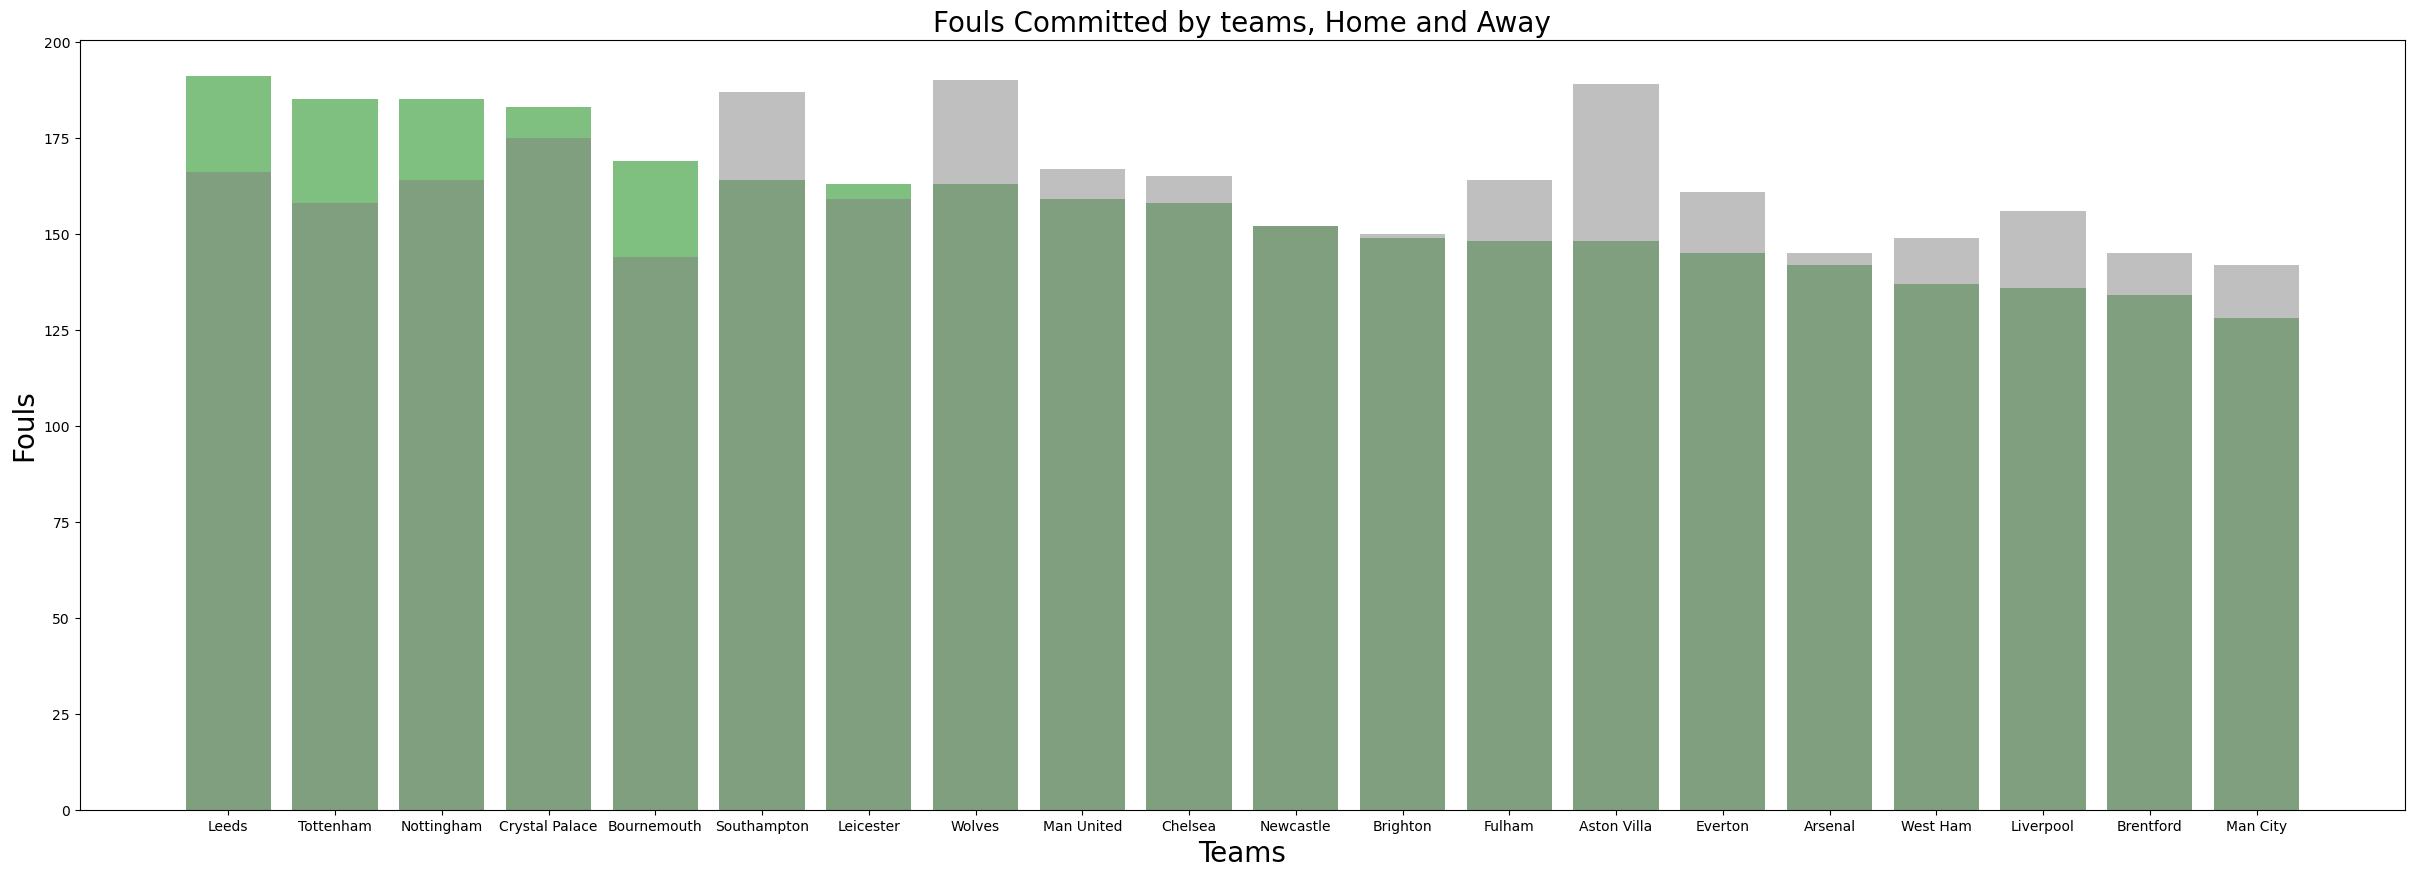

In [13]:
plt.figure(figsize=(30,10))
plt.bar(merged_fouls_HA["index"], merged_fouls_HA["HF"], color="green", alpha=0.5)
plt.bar(merged_fouls_HA["index"], merged_fouls_HA["AF"], color="grey", alpha=0.5)
plt.title("Fouls Committed by teams, Home and Away", fontsize = 20)
plt.xlabel("Teams", fontsize = 20)
plt.ylabel("Fouls", fontsize = 20)


plt.show()

In [14]:
home_HF = pl_cleaned.groupby(['HomeTeam']).agg({'HF':'sum'}).sort_values('HF', ascending=False)
away_AF = pl_cleaned.groupby(['AwayTeam']).agg({'AF':'sum'}).sort_values('AF', ascending=False)

merged_AH = away_AF.merge(home_HF, left_index=True, right_index=True, suffixes=('_home', '_away')).reset_index()
merged_AH

,index,AF,HF
0,Wolves,190,163
1,Aston Villa,189,148
2,Southampton,187,164
3,Crystal Palace,175,183
4,Man United,167,159
5,Leeds,166,191
6,Chelsea,165,158
7,Nottingham,164,185
8,Fulham,164,148
9,Everton,161,145


In [15]:
home_HF = pl_cleaned.groupby(['HomeTeam']).agg({'HF':'sum'}).sort_values('HF', ascending=False)
away_AF = pl_cleaned.groupby(['AwayTeam']).agg({'AF':'sum'}).sort_values('AF', ascending=True)

merged_Total_Fouls = home_HF.merge(away_AF, left_index=True, right_index=True, suffixes=('_home', '_away'))
merged_Total_Fouls = merged_AH.assign(Total_Fouls = merged_AH['HF'] + merged_AH['AF'])
merged_Total_Fouls

,index,AF,HF,Total_Fouls
0,Wolves,190,163,353
1,Aston Villa,189,148,337
2,Southampton,187,164,351
3,Crystal Palace,175,183,358
4,Man United,167,159,326
5,Leeds,166,191,357
6,Chelsea,165,158,323
7,Nottingham,164,185,349
8,Fulham,164,148,312
9,Everton,161,145,306


#### Number of fouls per referee and the ratio with the number of games they have refereed. 
#### Their level of strictness 

In [16]:
refs = pl_cleaned.groupby(['Referee']).agg({'HF':'sum', 'AF':'sum'})
refs['Total Fouls'] = refs['HF'] + refs['AF']

refs = refs.sort_values('Total Fouls', ascending=False).reset_index()
refs

,Referee,HF,AF,Total Fouls
0,P Tierney,262,255,517
1,M Oliver,259,227,486
2,A Taylor,213,239,452
3,S Hooper,215,224,439
4,R Jones,207,232,439
5,C Pawson,211,219,430
6,A Madley,209,219,428
7,S Attwell,209,206,415
8,P Bankes,195,191,386
9,D Coote,171,198,369


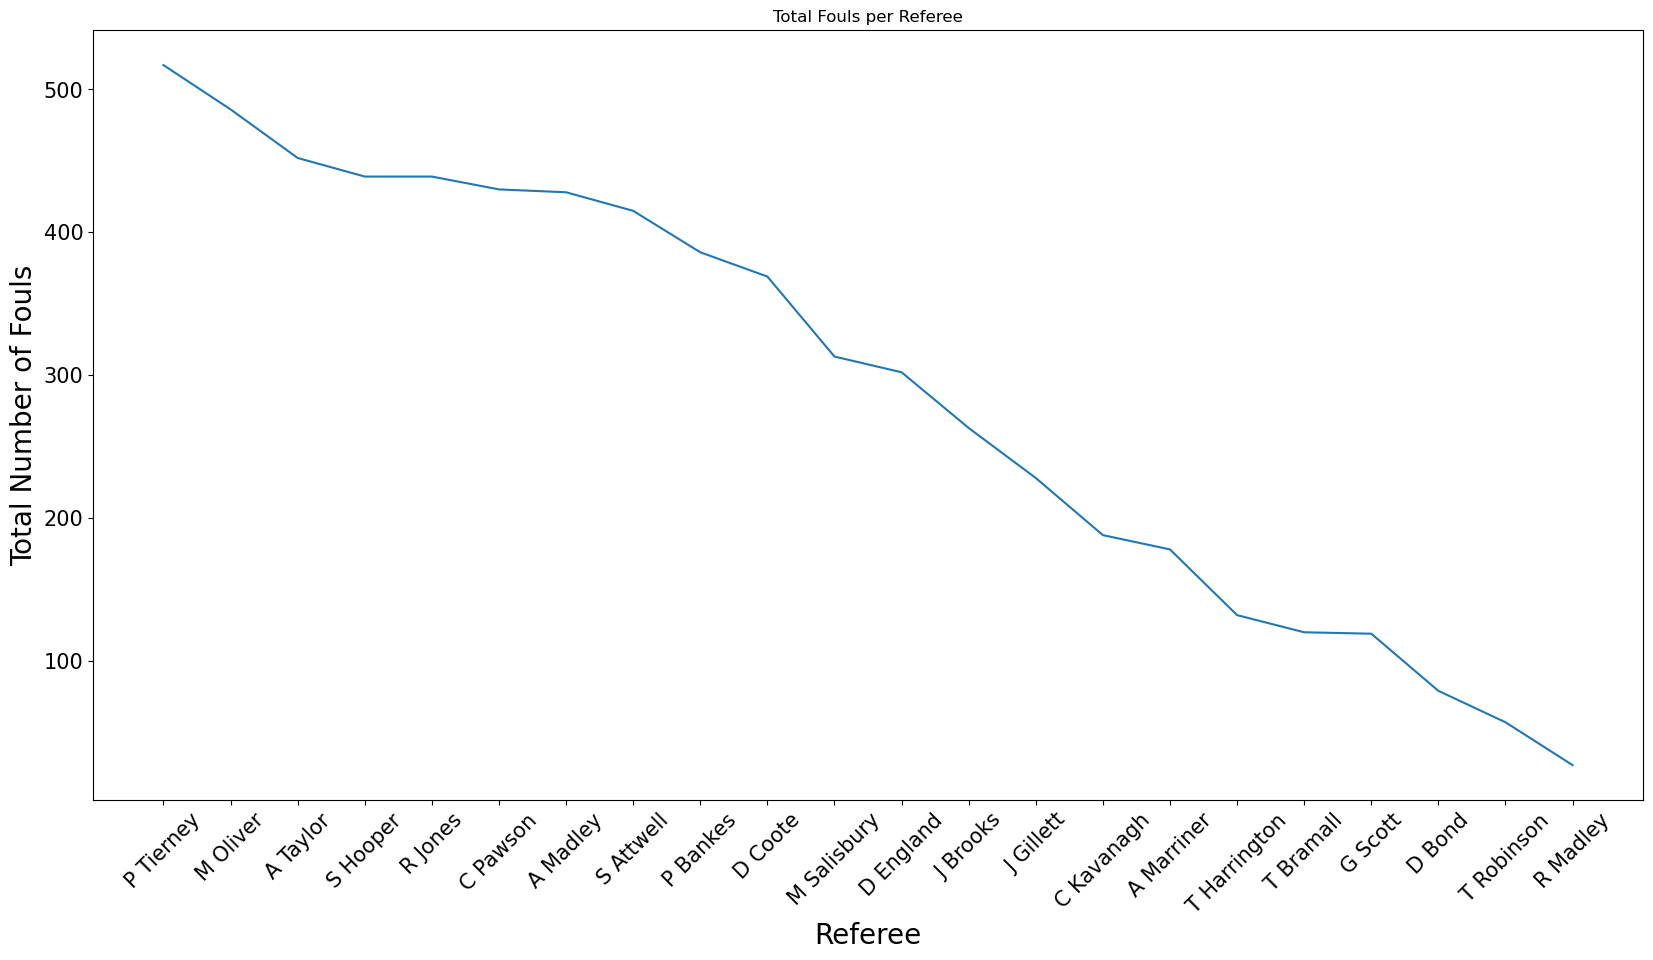

In [17]:
plt.figure(figsize=(20,10))
plt.plot(refs['Referee'], refs['Total Fouls'])
plt.xticks(fontsize=15, rotation=45)
plt.ylabel('Total Number of Fouls', fontsize = 20)
plt.yticks(fontsize=15)
plt.xlabel('Referee', fontsize = 20)
plt.title('Total Fouls per Referee')
plt.show()

In [18]:
refs_cleaned = referee_df.drop(['YELLOW CARDS', 'RED CARDS'], axis=1)
refs_cleaned

,Referee,FROM,GAMES 2022/23
0,Stuart Attwell,Warwickshire,25
1,Peter Bankes,Lancashire,21
2,Darren Bond,Lancashire,4
3,Thomas Bramall,England,8
4,John Brooks,England,19
5,David Coote,Nottinghamshire,21
6,Darren England,Doncaster,18
7,Jarred Gillett,Australia,17
8,Tony Harrington,Cleveland,6
9,Simon Hooper,Wiltshire,29


In [19]:
print(referee_df.columns)

Index(['Referee', 'FROM', 'GAMES 2022/23', 'YELLOW CARDS', 'RED CARDS'], dtype='object')


In [20]:
first = refs_cleaned['Referee'].str[0].str.upper()
last = refs_cleaned['Referee'].str.split().str[-1]
refs_cleaned["F Name"] = first+ " " + last
refs_cleaned.rename(columns = {'Referee':'REF'}, inplace=True)
refs_cleaned.rename(columns = {'F Name':'Referee'}, inplace = True)
refs_cleaned

,REF,FROM,GAMES 2022/23,Referee
0,Stuart Attwell,Warwickshire,25,S Attwell
1,Peter Bankes,Lancashire,21,P Bankes
2,Darren Bond,Lancashire,4,D Bond
3,Thomas Bramall,England,8,T Bramall
4,John Brooks,England,19,J Brooks
5,David Coote,Nottinghamshire,21,D Coote
6,Darren England,Doncaster,18,D England
7,Jarred Gillett,Australia,17,J Gillett
8,Tony Harrington,Cleveland,6,T Harrington
9,Simon Hooper,Wiltshire,29,S Hooper


In [21]:
merged_table = pd.merge(refs, refs_cleaned, on='Referee')
merged_table
refs_strict = merged_table.drop(['REF', 'FROM'], axis=1)

In [22]:
refs_strict['Number of Fouls/Apps'] = refs_strict['Total Fouls']/refs_strict['GAMES 2022/23']

refs_strict = refs_strict.rename(columns={"GAMES 2022/23": "Games"})
refs_strict = refs_strict.rename(columns={"Number of Fouls/Apps": "Fouls / Games"})

refs_strict = refs_strict.sort_values('Fouls / Games', ascending=False)

def strict(x):
    if x >= 20:
        return 'Very Strict'
    elif x >= 18.5:
        return 'Bearable'
    else:
        return 'Easy Going'

refs_strict['Strictness'] = refs_strict['Fouls / Games'].apply(strict)

refs_strict

,Referee,HF,AF,Total Fouls,Games,Fouls / Games,Strictness
20,T Robinson,23,34,57,2,28.500000,Very Strict
21,R Madley,10,17,27,1,27.000000,Very Strict
16,T Harrington,63,69,132,6,22.000000,Very Strict
10,M Salisbury,168,145,313,15,20.866667,Very Strict
5,C Pawson,211,219,430,21,20.476190,Very Strict
18,G Scott,58,61,119,6,19.833333,Bearable
19,D Bond,43,36,79,4,19.750000,Bearable
8,P Bankes,195,191,386,21,18.380952,Easy Going
6,A Madley,209,219,428,24,17.833333,Easy Going
9,D Coote,171,198,369,21,17.571429,Easy Going
